##**Contexto de negócio**

Uma companhia de seguros de viagem disponibilizou essa base de dados no kaggle que possui registros acerca de pessoas que viajaram e se essas pessoas contrataram o seguro-viagem. Sendo assim, o objetivo de negocio continua sendo o de criar um modelo que consiga prever com base nessas features quando que um cliente irá contratar um seguro-viagem. Esse modelo poderá auxiliar em algumas tomadas de decisão como campanhas direcionadas de marketing para ampliar o mercado consumidor, ajudando analistas de mercado a entender melhor o seu público-alvo. 

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Airplane/TravelInsurancePrediction.csv')
df.dropna()
df['Employment Type'].replace(['Government Sector','Private Sector/Self Employed'],[1,0],inplace=True)

df['GraduateOrNot'].replace(['Yes','No'],[1,0],inplace=True)

df['FrequentFlyer'].replace(['Yes','No'],[1,0],inplace=True)
df['EverTravelledAbroad'].replace(['Yes','No'],[1,0],inplace=True)
Categorias = [1,2,3,4,5,6,7,8,9]
Intervalos = [0,150000,300000,450000,600000,750000,900000,1000000,1500000,2000000]
df['AnnualIncome'] = pd.cut(df['AnnualIncome'], bins = Intervalos, labels = Categorias)
df['AnnualIncome'].value_counts()
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,3,6,1,0,0,0
1,1,31,0,1,8,7,0,0,0,0
2,2,34,0,1,4,4,1,0,0,1
3,3,28,0,1,5,3,1,0,0,0
4,4,28,0,1,5,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,0,1,8,4,0,1,1,1
1983,1983,28,0,1,9,5,1,0,1,0
1984,1984,28,0,1,8,6,1,0,0,0
1985,1985,34,0,1,7,6,0,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(df, train_size=0.8)

Ao todo, a base de dados possui 1987 registros. Nesse modelo em específico dividiremos ela em 80% para treino e 20% para teste.

In [ ]:
import tensorflow
from tensorflow import keras

nn = keras.Sequential([
      keras.layers.Input(len(treino.columns)-3),
      keras.layers.Dense(4, activation='relu'),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(2, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam' , loss='binary_crossentropy')

nn.fit(treino[list(treino.columns[2:-1])] , treino['TravelInsurance'])


50/50 [==============================] - 1s 2ms/step - loss: 0.6925


Nesse trecho de código foi criada uma rede neural, que possui como entradas todas as features do modelo (Menos a idade). Ao todo, a rede possui 4 camadas, sendo elas 3 intermediárias e uma de saída. As camadas intermediárias começam com 4 neurônios e o número de neurônios vai reduzindo de 1 em 1 até chegar na camada de saída. Após alguns testes decidimos que essa seria a configuração recomendada para a rede. Desse modo, realizamos o fit das features e da label no modelo para começar a fazer as predições de treino.

In [ ]:
prevs_treino = nn.predict(treino[list(treino.columns[2:-1])])
prevs_treino[:25]

array([[0.49199843],
       [0.5073818 ],
       [0.49199843],
       [0.48904318],
       [0.48904318],
       [0.50634485],
       [0.48904318],
       [0.48904318],
       [0.48904318],
       [0.5004028 ],
       [0.49561045],
       [0.48904318],
       [0.4912728 ],
       [0.5072905 ],
       [0.50385654],
       [0.4968051 ],
       [0.48904318],
       [0.5073818 ],
       [0.5109064 ],
       [0.48904318],
       [0.51228356],
       [0.48967096],
       [0.5205208 ],
       [0.4968051 ],
       [0.48904318]], dtype=float32)

In [ ]:
prev_treino = []
for prev in prevs_treino:
  prev_treino.append(0 if prev < 0.5 else 1)


In [ ]:
y_treino = treino['TravelInsurance']
y_treino

1496    0
132     0
683     0
696     0
66      0
       ..
1980    0
1668    0
289     0
1703    0
401     0
Name: TravelInsurance, Length: 1589, dtype: int64

Após alguns testes de eficácia do treino, chegamos á conclusão de que o valor de ativação mais adequado para esta rede seria de 0.5. Esse valor corresponde a classificação dos resultados previstos pela rede neural em sim/não, que no contexto do negócio significa(contratou/não-contratou). Feita essa ponderação, hora de ver como o modelo se comporta em treino.

In [ ]:
from sklearn.metrics import accuracy_score
acrr_treino = accuracy_score(y_treino,prev_treino) * 100
acrr_treino

65.8275645059786

Com uma acurácia de 65% em treino, vemos que no geral o modelo possui uma boa confiabilidade nas tomadas de decisões. Apesar de não ser um cenário tão bom é possível ver que ele já acerta mais da metade registros que são apresentados para ele. Isso poderia facilitar a vida de muitos analistas de negócio de empresas de seguros que coletem esses dados de seus clientes, pois facilitaria o traçamento de um perfil dos consumidores do serviço seguro-viagem. Mesmo assim, não há como dizer que esse modelo sozinho traria uma grande mudança na forma como as empresas abordam seus clientes. Porém, como estamos tratando de um contexto onde a maioria das decisões dizem a respeito de marketing e investigação, é um resultado bem válido.

In [ ]:
prevs_teste = nn.predict(teste[list(treino.columns[2:-1])] )
prev_teste = []
for prev in prevs_teste:
  prev_teste.append(0 if prev < 0.5  else 1)

prev_teste[:15]

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
y_teste = teste['TravelInsurance']
y_teste

1005    0
1706    0
519     1
370     1
961     0
       ..
279     0
356     0
846     0
1348    0
1860    0
Name: TravelInsurance, Length: 398, dtype: int64

Realizando agora as mesmas implementações de treino porém com o conjunto de teste.

In [ ]:
from sklearn.metrics import accuracy_score
accr_teste = accuracy_score(y_teste,prev_teste) * 100
accr_teste

66.08040201005025

Vemos que em teste a acurácia aumentou de 65% para 66%, o que mostra que não houve underfit e o modelo conseguiu fazer previsões razoavelmente boas a respeito da contratação do serviço. Com o objetivo de melhorar a análise de negócio, esses resultados apontam que a rede neural possui uma limitação bem clara a respeito de fazer predições mas pode sim ser usada como uma ferramenta pelos analistas. Não como o principal parâmetro para tomar decisões mas sim como um bom indicador. Nos resta analisar agora as proporções de acertos e erros para tirar conclusões mais precisas

[[195  53]
 [ 82  68]]


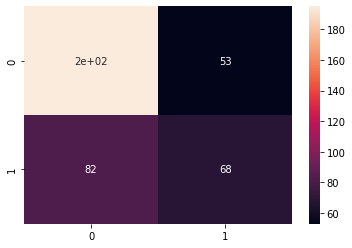

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = confusion_matrix(y_teste , prev_teste)
print(cm)
sns.heatmap(cm, annot=True)

A matriz de confusão mostra que o modelo teve bastante eficácia em detectar negativos, mas uma deficiência em relação à detecção dos positivos. Vemos que o número de FN é relativamente maior que o número de TP. No nosso cenário, isso pode prejudicar a empresa por estar perdendo possíveis clientes. Contudo, como evidenciado antes, o objetivo dessa rede é servir como uma ferramenta para dar indicações. Sendo assim, na perspectiva de que o modelo apontou bem os negativos, será mais simples para analistas de mercado identificar o seu mercado consumidor pois eles já terão um bom parâmetro do que **não** caracteriza o seu público alvo. E com base nisso, poderão determinar com mais precisão os fatores principais que levam um possível cliente a contratar seus serviços. 

In [ ]:
print(classification_report(y_teste,prev_teste))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       248
           1       0.56      0.45      0.50       150

    accuracy                           0.66       398
   macro avg       0.63      0.62      0.62       398
weighted avg       0.65      0.66      0.65       398



Como é possível observar, o modelo tem uma boa precisão em identificar os que não contrataram porém uma baixa precisão em identificar aqueles que contrataram. Sendo dos que não contrataram, a precisão foi de 70% e o recall de 79%, enquanto dos que contrataram a precisão foi de 56% e o recall de 45%

Tendo em vista os resultados obtidos após a implementação, concluímos que a rede neural utilizada não é o algoritmo ideal para identificar os possíveis compradores do seguro-viagem. Porém, se utilizada como uma ferramenta de indicação, ela pode vir a ser bem útil para analistas de mercado. Por ter uma boa precisão em identificar aqueles que não contratariam um serviço, muitas opções de perfis de clientes já podem ser descartadas, economizando bastante tempo da empresa nas suas pesquisas de mercado. Desse modo, para um bom proveito desse modelo ele não teria que ser utilizado sozinho, mas sim com outros dados e outros algoritmos que fariam uma comparação.